In [174]:
from IPython.core.display import display, HTML
import pandas as pd
import os

display(HTML('<b>Dirs</b>'))
print(os.listdir("datasets"))

display(HTML('<b>Importing data</b>'))

['gender_submission.csv', 'test.csv', 'train.csv']


In [175]:


folder = "datasets"

passengers_df = pd.read_csv(folder + "\\gender_submission.csv")
train_df = pd.read_csv(folder + "\\train.csv")
tests_df = pd.read_csv(folder + "\\test.csv")

display(HTML('<b>Removing useless features</b>'))

In [176]:
train_df.drop('Ticket', axis=1, inplace=True)
train_df.drop('Cabin', axis=1, inplace=True)
train_df.drop('Name', axis=1, inplace=True)
train_df.drop('PassengerId', axis=1, inplace=True)

tests_df.drop('Ticket', axis=1, inplace=True)
tests_df.drop('Cabin', axis=1, inplace=True)
tests_df.drop('Name', axis=1, inplace=True)
tests_df.drop('PassengerId', axis=1, inplace=True)

print(tests_df)

     Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0         3    male  34.5      0      0    7.8292        Q
1         3  female  47.0      1      0    7.0000        S
2         2    male  62.0      0      0    9.6875        Q
3         3    male  27.0      0      0    8.6625        S
4         3  female  22.0      1      1   12.2875        S
5         3    male  14.0      0      0    9.2250        S
6         3  female  30.0      0      0    7.6292        Q
7         2    male  26.0      1      1   29.0000        S
8         3  female  18.0      0      0    7.2292        C
9         3    male  21.0      2      0   24.1500        S
10        3    male   NaN      0      0    7.8958        S
11        1    male  46.0      0      0   26.0000        S
12        1  female  23.0      1      0   82.2667        S
13        2    male  63.0      1      0   26.0000        S
14        1  female  47.0      1      0   61.1750        S
15        2  female  24.0      1      0   27.7208       

In [177]:
print(train_df.isnull().sum())
print(tests_df.isnull().sum())


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [178]:
display(HTML('<b>Problem! There are several records with age missing. The approach chosen to deal with it is just for test purpose. There are much more sophisticated techniques to predict a missing value </b>'))

In [179]:
import numpy as np

train_df['Age'].fillna(0,inplace=True) 
tests_df['Age'].fillna(0,inplace=True)

age_df = pd.concat([train_df['Age'], tests_df['Age']])
mean = age_df.mean()
std = age_df.std()

train_df['Age'] = np.where(train_df['Age'] == 0, (np.random.randint(mean - std,mean + std)), train_df['Age'])
tests_df['Age'] = np.where(tests_df['Age'] == 0, (np.random.randint(mean - std,mean + std)), tests_df['Age'])

In [180]:
display(HTML('<b>Checking if all passengers has an age </b>'))
print(train_df['Age'].isnull().sum())
print(tests_df['Age'].isnull().sum())

0
0


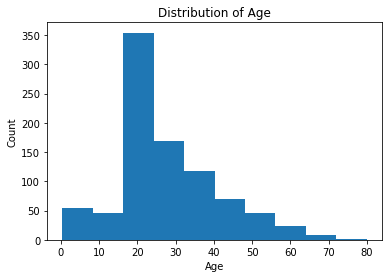

In [181]:
display(HTML('<b>Checking age distribution </b>'))

import matplotlib.pyplot as plt
plt.hist(train_df['Age'],bins = 10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

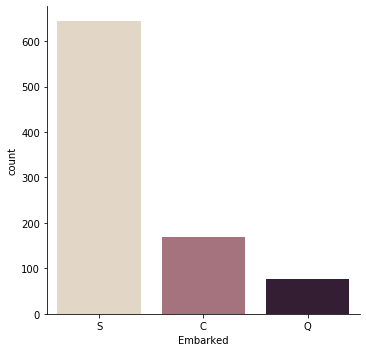

In [182]:
display(HTML('<b>Checking Embark data </b>'))

import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="Embarked", kind="count", palette="ch:.23", data=train_df);

In [183]:
display(HTML('<b> As cathegory "S" is the most common embark place, we will fill as "S" the empty Embark information of the 2 passengers who have this data missing </b>'))

In [184]:
top = 'S'
train_df['Embarked'].fillna(top,inplace=True) 
print(train_df['Embarked'].isnull().sum())




0


In [195]:
display(HTML('<b> Encoding category columns  </b>'))


embarked = {"C":0,"Q":1,"S":2} 

train_df['Sex'] = train_df['Sex'].replace('male', 0)
train_df['Sex'] = train_df['Sex'].replace('female', 1)

train_df['Embarked'] = train_df['Embarked'].replace('C', 0)
train_df['Embarked'] = train_df['Embarked'].replace('Q', 1)
train_df['Embarked'] = train_df['Embarked'].replace('S', 2)


print(train_df)

display(HTML('<b> Creating variables to feed the model  </b>'))

     Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
0           0       3    0  22.0      1      0    7.2500         2
1           1       1    1  38.0      1      0   71.2833         0
2           1       3    1  26.0      0      0    7.9250         2
3           1       1    1  35.0      1      0   53.1000         2
4           0       3    0  35.0      0      0    8.0500         2
5           0       3    0  20.0      0      0    8.4583         1
6           0       1    0  54.0      0      0   51.8625         2
7           0       3    0   2.0      3      1   21.0750         2
8           1       3    1  27.0      0      2   11.1333         2
9           1       2    1  14.0      1      0   30.0708         0
10          1       3    1   4.0      1      1   16.7000         2
11          1       1    1  58.0      0      0   26.5500         2
12          0       3    0  20.0      0      0    8.0500         2
13          0       3    0  39.0      1      5   31.2750      

In [220]:
from sklearn.model_selection import train_test_split

X_train_total = train_df.drop('Survived',axis = 1)
y_train_total = train_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X_train_total, y_train_total, test_size=0.2, random_state=120)


In [221]:

display(HTML('<b> Creating Decision tree model  </b>'))
print(list(x_train))

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [246]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.externals import joblib



decision_tree = tree.DecisionTreeClassifier(max_depth=3)

decision_tree = decision_tree.fit(x_train,y_train)

In [247]:
dot_data = tree.export_graphviz(decision_tree, feature_names = list(X_train),class_names = ['Died', 'Survived'],out_file = None ) 
graph = Source(dot_data) 
graph.render("test")

'test.pdf'

In [248]:
display(HTML('<b> Calculating cross validation  for decision tree</b>'))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print(cross_val_score(decision_tree, x_test, y_test, cv = 10)) 
pred = decision_tree.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

[0.83333333 0.83333333 0.77777778 0.83333333 0.83333333 0.66666667
 0.83333333 0.72222222 0.61111111 0.70588235]
Accuracy of  79.88826815642457


In [250]:
display(HTML('<b> Calculating cross validation  for Random Forest</b>'))
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators = 9)
model_rf = clf.fit(x_train, y_train) 

print(cross_val_score(model_rf, x_test, y_test, cv = 10)) 
pred = model.predict(x_test)
print('Accuracy of ', accuracy_score(pred, y_test)*100)

[0.83333333 0.77777778 0.72222222 0.88888889 0.88888889 0.72222222
 0.83333333 0.77777778 0.88888889 0.76470588]
Accuracy of  81.00558659217877
